,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)



Unique Users: 943
Unique Movies: 1682


<ipython-input-10-05b52c47d7dd>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='coolwarm')


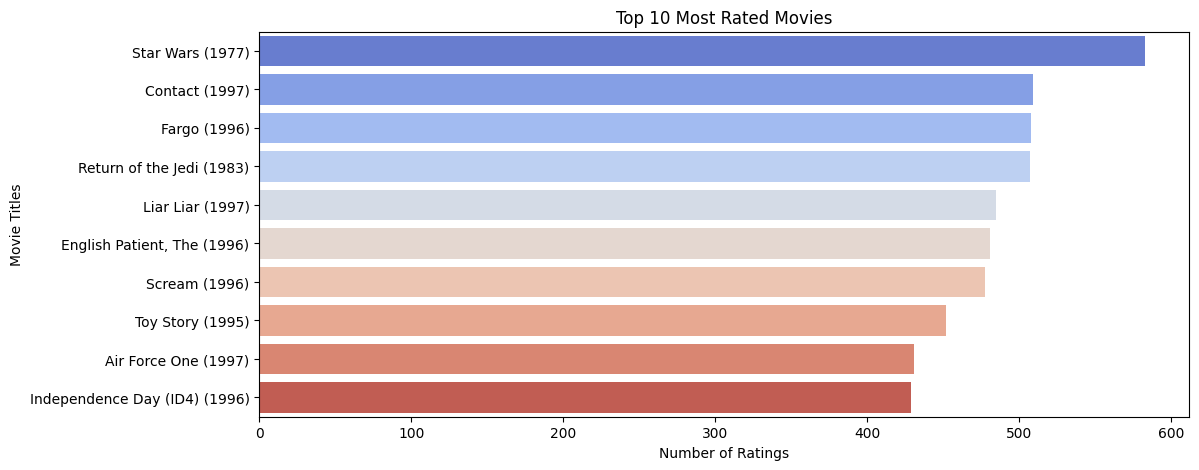

Training SVD Model...


Training Progress: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


RMSE: 0.9378
Model RMSE: 0.9377952756850588
Enter User ID for Recommendations: 1


,item_id,Predicted_Rating,title
0,408,4.777373,"Close Shave, A (1995)"
1,483,4.737087,Casablanca (1942)
2,302,4.609739,L.A. Confidential (1997)
3,963,4.607341,Some Folks Call It a Sling Blade (1993)
4,647,4.527414,Ran (1985)


from matplotlib import pyplot as plt
recommendations['item_id'].plot(kind='hist', bins=20, title='item_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
recommendations['Predicted_Rating'].plot(kind='hist', bins=20, title='Predicted_Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
recommendations.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
recommendations.plot(kind='scatter', x='item_id', y='Predicted_Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
recommendations['item_id'].plot(kind='line', figsize=(8, 4), title='item_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
recommendations['Predicted_Rating'].plot(kind='line', figsize=(8, 4), title='Predicted_Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(recommendations['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(recommendations, x='item_id', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(recommendations['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(recommendations, x='Predicted_Rating', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from tqdm import tqdm

# Load datasets
ratings_file = "u.data"
movies_file = "u.item"

# Load ratings dataset
columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_file, sep='\t', names=columns)

# Load movies dataset
movies = pd.read_csv(movies_file, sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])

# Merge ratings with movie titles
ratings = ratings.merge(movies, on='item_id')
ratings = ratings.drop(columns=['timestamp'])  # Drop timestamp

# Display dataset preview
display(ratings.head())

# -----------------------------------
# Exploratory Data Analysis (EDA)
# -----------------------------------

# Count number of unique users and movies
print("\nUnique Users:", ratings['user_id'].nunique())
print("Unique Movies:", ratings['item_id'].nunique())

# Visualizing top-rated movies
plt.figure(figsize=(12, 5))
top_movies = ratings.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_movies.values, y=top_movies.index, palette='coolwarm')
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Titles")
plt.title("Top 10 Most Rated Movies")
plt.show()

# -----------------------------------
# Applying Collaborative Filtering using Surprise Library
# -----------------------------------

# Define reader format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD Model (Matrix Factorization) with progress bar
print("Training SVD Model...")
model = SVD()
for epoch in tqdm(range(10), desc="Training Progress"):
    model.fit(trainset)

# Predict on the test set
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
print("Model RMSE:", rmse)

# -----------------------------------
# Generate Movie Recommendations for a Specific User
# -----------------------------------

def get_recommendations(user_id, num_recommendations=5):
    movie_ids = ratings['item_id'].unique()
    rated_movies = ratings[ratings['user_id'] == user_id]['item_id'].values

    predictions = [model.predict(user_id, movie_id) for movie_id in movie_ids if movie_id not in rated_movies]
    predictions.sort(key=lambda x: x.est, reverse=True)

    recommended_movies = pd.DataFrame([(pred.iid, pred.est) for pred in predictions[:num_recommendations]], columns=['item_id', 'Predicted_Rating'])
    recommended_movies = recommended_movies.merge(movies, on='item_id')

    return recommended_movies

# Interactive input for user ID
user_id = int(input("Enter User ID for Recommendations: "))
recommendations = get_recommendations(user_id)

display(recommendations)

